# Chainer の Hello World

In [1]:
# coding: UTF-8

import chainer
from chainer import Variable, Chain, optimizers
import chainer.links as L
import chainer.functions as F

import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# 階段関数のデータ
x, t = [ ], [ ]
for i in np.linspace(-1, 1, 100):
    x.append([i])
    if i < 0:
        t.append([0])
    else:
        t.append([1])

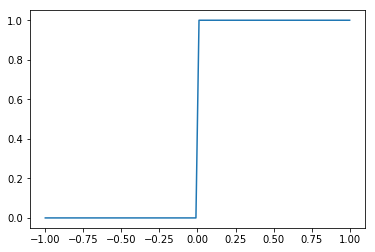

In [3]:
# 階段関数の描画
plt.plot(np.array(x, dtype = np.float32).flatten(), np.array(t, dtype = np.float32).flatten())
plt.show()

In [4]:
# Chainの記述
class MyChain(Chain):
    def __init__(self):
        super(MyChain, self).__init__(
            l1 = L.Linear(1, 10),
            l2 = L.Linear(10, 1),
        )
    
    def predict(self, x):
        h1 = F.sigmoid(self.l1(x))
        return self.l2(h1)

In [5]:
# Variableの記述
x = Variable(np.array(x, dtype = np.float32))
t = Variable(np.array(t, dtype = np.float32))

model = MyChain()

In [6]:
# Optimizer の記述
optimizer = chainer.optimizers.Adam()
optimizer.setup(model)

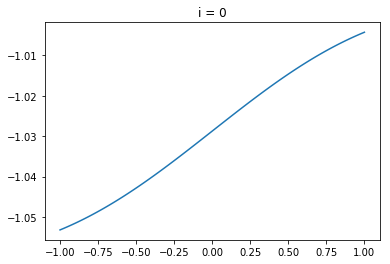

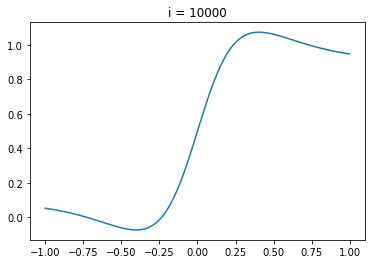

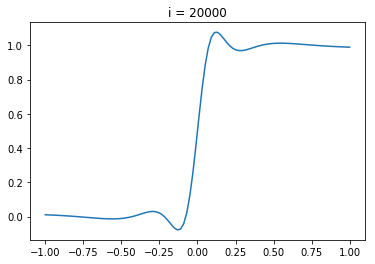

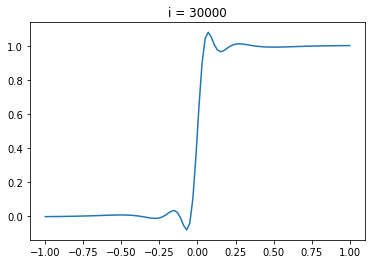

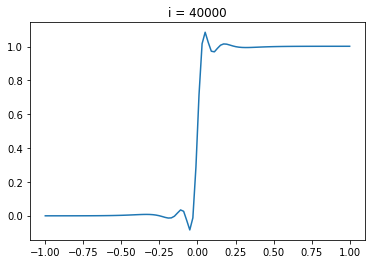

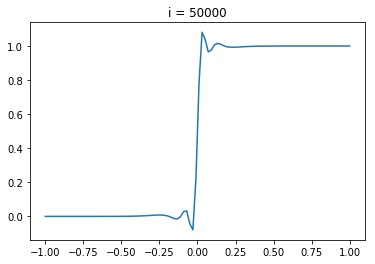

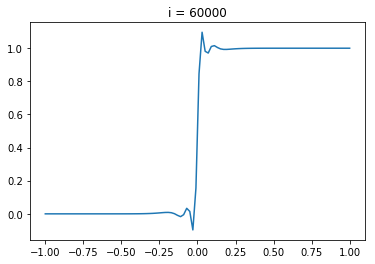

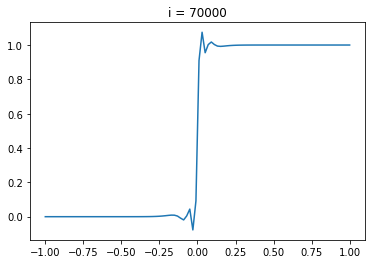

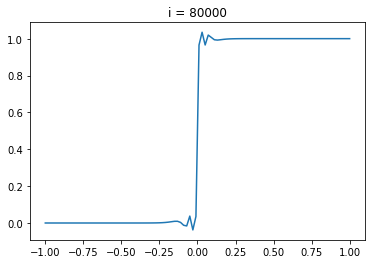

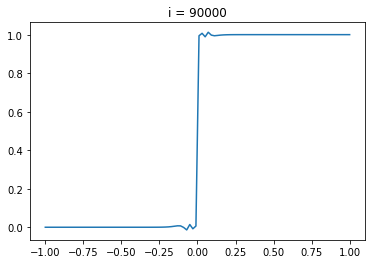

In [7]:
# 学習
y = None
for i in range(100000):
    
    model.cleargrads()
    y = model.predict(x)
    
    # 学習過程の表示
    if i%10000 == 0:
        plt.plot(x.data.flatten(), y.data.flatten())
        plt.title("i = " + str(i))
        plt.show()
        
    # 損失関数による誤差の計算、この場合は平均2乗誤差
    loss = F.mean_squared_error(y, t)
    loss.backward()
    
    # Optimizerによる重みの更新
    optimizer.update()

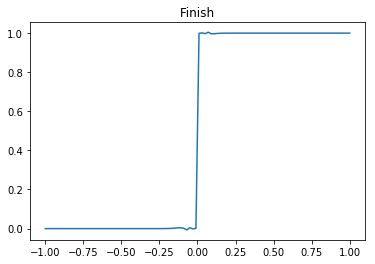

In [8]:
# 結果の表示
plt.plot(x.data.flatten(), y.data.flatten())
plt.title("Finish")
plt.show()

どんどん階段関数へ近づいていっていることがよく分かる